# Import

https://www.youtube.com/watch?v=t9Ed5QyO7qY dobar video za ovo 


In [2]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
from shapely.geometry import Point
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx
import folium
from folium.features import DivIcon
from folium import IFrame
import json
import seaborn as sns
from PIL import Image
import math
from matplotlib.pyplot import figure
from vega_datasets import data as vdsa

# Import podataka za lokacije

In [3]:
# data path
path_excel = (r'..\kristina_nbs\traffic_KP.xlsx')
# load data frame
df_start = pd.read_excel(path_excel, engine='openpyxl', sheet_name='Sheet1', index_col=0)
# convert to geodf with geometry column
df = df_start.copy()
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df['Longitude'], df['Latitude']))
df_start


,Directions,Street,Abschnitt,Longitude,Latitude,Reference_station,Distance to ref
Code,,,,,,,
8010_205,EastWest,Grabengürtel,Unterflurstrasse,15.426301,47.087794,NaN,NaN
8010_208,SouthNorth,Glacis,Geidorfplatz,15.443536,47.077866,NaN,NaN
8010_209,EastWest,Elisabethstrasse,Hartenaugasse,15.457930,47.076679,NaN,NaN
8010_213,East,Grazbachgasse,Klosterwiesgasse,15.444325,47.065714,OST,NaN
8010_214,SouthNorth,C.v. Hötzendorf-Straße,Ostbahnhof,15.448640,47.054039,NaN,NaN
8020_102,SouthNorth,Wiener Str.,Kalvariengürtel,15.414366,47.084801,NORD,NaN
8020_103,SouthNorth,Bahnhofgürtel,Keplerstrasse,15.418547,47.073193,NaN,NaN
8020_107,SouthNorth,Triesterstrasse,Lauzilgasse,15.429734,47.045648,NaN,NaN
8020_110,SouthNorth,Kärntner Str. Q2,südl. d. Wetzelsdorfer Straße,15.418848,47.058659,DONBOSCO,NaN


# Graf za Graz

In [4]:
# Graz area
place_name = "Graz, Austria"
area = ox.geocode_to_gdf(place_name)

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [5]:
df.crs = 'epsg:4326'

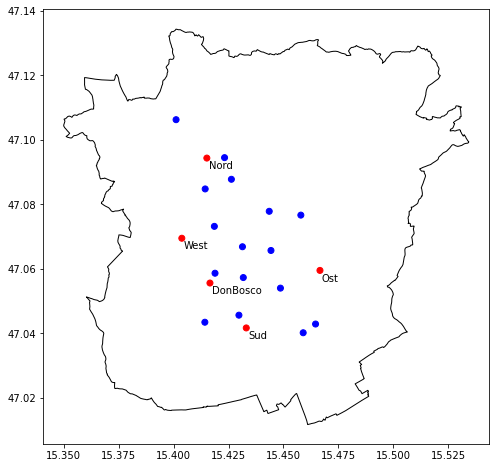

In [6]:
# color main stations as red
df['color'] = np.nan
for i in df.index:
    if df.loc[i].name in ['Nord','Ost','West','DonBosco','Sud']:
        df.loc[i, 'color'] = 'red'
    else:
        df.loc[i, 'color'] = 'blue'

ax = area.plot(figsize = (10,8), color='white', edgecolor='black')
df.plot(ax=ax, color=df.color)
for x, y, label in zip(df.geometry.x, df.geometry.y, df.index):
    if label in ['Nord','Ost','West','DonBosco','Sud']:
        ax.annotate(label, xy=(x, y), xytext=(2, -11), textcoords="offset points")
plt.show()

# data za grafove na markerima

In [59]:
data = pd.read_csv(r'new_5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv')
features = ['Unnamed: 0','N_NO2','O_NO2','W_NO2','D_NO2','S_NO2']
data = data[features]
data_new =data.rename(columns = {'Unnamed: 0':'Year'})
# data['Longitude']= 15.415122
# data['Latitude']= 47.094370
# data_w = data
# data_w_x = data_w['Unnamed: 0']
# data_w_y = data_w['N_NO2']

In [60]:
data_new

,Year,N_NO2,O_NO2,W_NO2,D_NO2,S_NO2
0,2010-01-01,37.758297,52.362980,47.048294,62.420425,45.165530
1,2010-01-02,25.938934,36.956390,35.495000,49.886177,33.300850
2,2010-01-03,11.074873,15.286636,13.905152,21.900616,14.216703
3,2010-01-04,18.268064,24.183193,22.021637,36.261917,26.544174
4,2010-01-05,41.781490,42.627240,50.603188,71.757225,51.446163
...,...,...,...,...,...,...
4201,2021-07-03,14.935202,19.609596,20.356472,33.136486,21.049612
4202,2021-07-04,8.624179,14.503092,11.550471,19.907900,13.824055
4203,2021-07-05,16.112087,12.612704,14.112437,20.364044,12.696744
4204,2021-07-06,7.977263,15.851383,13.191885,24.437843,13.073669


# Lokacije postaja za mjerneje N_NO2

In [121]:
x_values = []
y_values = []
label_values = []
for x, y, label in zip(df.geometry.x, df.geometry.y, df.index):
    if label in ['Nord','Ost','West','DonBosco','Sud']:
        x_values.append(x)
        y_values.append(y)
        label_values.append(label)

features_graf = ['N_NO2','O_NO2','W_NO2','D_NO2','S_NO2']


# MAP

In [129]:
m = folium.Map(location = [47.0707, 15.4395], zoom_start = 12, tiles = "Stamen Terrain")
feature_group = folium.FeatureGroup("Locations")
labels = ['Nord','Ost','West','DonBosco','Sud']
for x1,y1,feature,label in zip(x_values,y_values,features_graf,labels):
    podatak = data_new[['Year', feature]]
    graf_2 = alt.Chart(podatak,width=300).mark_line().encode(x='Year:T',y=feature).properties(title=label)
    feature_group.add_child(folium.Marker(location=[y1,x1],popup=folium.Popup(max_width=450).add_child(
    folium.features.VegaLite(graf_2, width=450, height=250)), icon=folium.Icon(icon="cloud")))

m.add_child(feature_group)
m